In [246]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pylab
import numpy as np
import timeit

# Paired debruijin
start = timeit.default_timer()


def kmers(read, k,d):
    KList=[]
    KList2=[]
    PairedKmers=[]
    num_kmers = len(read) - k + 1
    for i in range(num_kmers):
        kmer = read[i:i+k]
        if i==0:
            KList.append(kmer)
        else:
            KList.append(kmer) 
            
    num_kmers1 = len(read) - k + 1
    for i in range(k+d,num_kmers1):
        kmer = read[i:i+k]
        if i==0:
            KList2.append(kmer)
        else:
            KList2.append(kmer)
    
    KList1=KList[0:len(KList2)]
    
    for i in range(len(KList2)):
        PairedKmers.append([KList1[i],KList2[i]])
    
    return KList1,KList2,PairedKmers

def sortkmer(kmerlist):
    tempkmerlist=kmerlist
    for i in range(len(tempkmerlist) - 1):
        for j in range(i + 1, len(tempkmerlist)):
            if tempkmerlist[i][0] > tempkmerlist[j][0]:
                temp = tempkmerlist[i]
                tempkmerlist[i] = tempkmerlist[j]
                tempkmerlist[j] = temp
    return tempkmerlist


input1="TCTCCATGCATTTGGTATTTT"

k=3
d=1
Kmers=kmers(input1,k,d)

print(f"KmerList1={Kmers[0]}")
print(" ")
print(f"KmerList2={Kmers[1]}")
print()
print(f"PairedKmers={Kmers[2]}")
print()


KmerList1=['TCT', 'CTC', 'TCC', 'CCA', 'CAT', 'ATG', 'TGC', 'GCA', 'CAT', 'ATT', 'TTT', 'TTG', 'TGG', 'GGT', 'GTA']
 
KmerList2=['CAT', 'ATG', 'TGC', 'GCA', 'CAT', 'ATT', 'TTT', 'TTG', 'TGG', 'GGT', 'GTA', 'TAT', 'ATT', 'TTT', 'TTT']

PairedKmers=[['TCT', 'CAT'], ['CTC', 'ATG'], ['TCC', 'TGC'], ['CCA', 'GCA'], ['CAT', 'CAT'], ['ATG', 'ATT'], ['TGC', 'TTT'], ['GCA', 'TTG'], ['CAT', 'TGG'], ['ATT', 'GGT'], ['TTT', 'GTA'], ['TTG', 'TAT'], ['TGG', 'ATT'], ['GGT', 'TTT'], ['GTA', 'TTT']]



In [247]:
def CreatePairedKmers(PairedKmerList):
    NodesListOfLists=[]
    for edge in PairedKmerList:
        NodesListOfLists.append([edge[0][:k-1],edge[1][:k-1]])
    NodesListOfLists.append([PairedKmerList[-1][0][1:k],PairedKmerList[-1][1][1:k]])
    return NodesListOfLists
ListOfPairedNodes = CreatePairedKmers(Kmers[2])
print(f"Nodes = {ListOfPairedNodes}")

Nodes = [['TC', 'CA'], ['CT', 'AT'], ['TC', 'TG'], ['CC', 'GC'], ['CA', 'CA'], ['AT', 'AT'], ['TG', 'TT'], ['GC', 'TT'], ['CA', 'TG'], ['AT', 'GG'], ['TT', 'GT'], ['TT', 'TA'], ['TG', 'AT'], ['GG', 'TT'], ['GT', 'TT'], ['TA', 'TT']]


In [248]:
def CreateEdgesList(ListOfPairedNodes):
    AlternateRep=[]
    EdgeList=[]
    for i in range((len(ListOfPairedNodes))):
        AlternateRep.append(ListOfPairedNodes[i][0]+','+ListOfPairedNodes[i][1])
        
    for i in range(len(ListOfPairedNodes)-1):
        EdgeList.append([AlternateRep[i],AlternateRep[i+1]])
    return EdgeList
EdgeList=CreateEdgesList(ListOfPairedNodes)
EdgeList

[['TC,CA', 'CT,AT'],
 ['CT,AT', 'TC,TG'],
 ['TC,TG', 'CC,GC'],
 ['CC,GC', 'CA,CA'],
 ['CA,CA', 'AT,AT'],
 ['AT,AT', 'TG,TT'],
 ['TG,TT', 'GC,TT'],
 ['GC,TT', 'CA,TG'],
 ['CA,TG', 'AT,GG'],
 ['AT,GG', 'TT,GT'],
 ['TT,GT', 'TT,TA'],
 ['TT,TA', 'TG,AT'],
 ['TG,AT', 'GG,TT'],
 ['GG,TT', 'GT,TT'],
 ['GT,TT', 'TA,TT']]


nodes = ['TC,CA', 'CT,AT', 'TC,TG', 'CC,GC', 'CA,CA', 'AT,AT', 'TG,TT', 'GC,TT', 'CA,TG', 'AT,GG', 'TT,GT', 'TT,TA', 'TG,AT', 'GG,TT', 'GT,TT', 'TA,TT']
 
edges = [('TC,CA', 'CT,AT'), ('CT,AT', 'TC,TG'), ('TC,TG', 'CC,GC'), ('CC,GC', 'CA,CA'), ('CA,CA', 'AT,AT'), ('AT,AT', 'TG,TT'), ('TG,TT', 'GC,TT'), ('GC,TT', 'CA,TG'), ('CA,TG', 'AT,GG'), ('AT,GG', 'TT,GT'), ('TT,GT', 'TT,TA'), ('TT,TA', 'TG,AT'), ('TG,AT', 'GG,TT'), ('GG,TT', 'GT,TT'), ('GT,TT', 'TA,TT')]


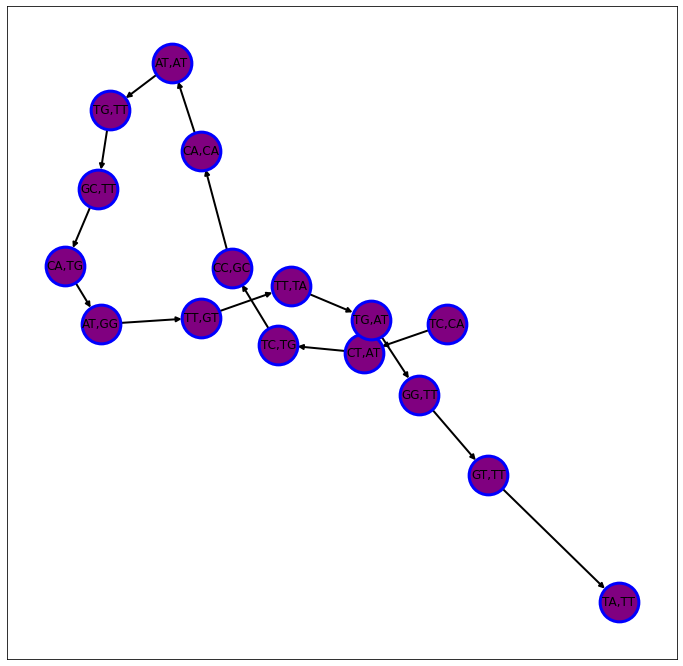

In [249]:
G = nx.MultiDiGraph()
G.add_edges_from(EdgeList)
totalNodes=G.nodes()
pos = nx.spring_layout(G)
options = {
    "font_size": 12,
    "node_size": 1500,
    "node_color": "purple",
    "edgecolors": "blue",
    "linewidths": 3,
    "width": 2,
    "edge_vmin":5
}
nodes=G.nodes()
edges=G.edges()

print()
print(f"nodes = {nodes()}")
print(" ")
print(f"edges = {edges}")

plt.figure(2,figsize=(12,12))
nx.draw_networkx(G,pos,**options)
plt.show()

In [250]:
# converting list of lists in dictionary format
def ConvertListToDict(List):
    Dict={}
    for i in List:
        if i[0] in Dict.keys():
            newList = Dict[i[0]]
            newList.extend([i[1]])
            Dict.update({i[0]: newList})
        else:
            Dict[i[0]] = [i[1]]
    return Dict

Output=ConvertListToDict(edges)


In [251]:
def eulerian_cycle(edge_dict):
    tempo1=list(edge_dict.keys())
    current_node = tempo1[0]
    path = [current_node]
    while True:
        path.append(edge_dict[current_node][0])

        if len(edge_dict[current_node]) == 1:
            del edge_dict[current_node]
        else:
            edge_dict[current_node] = edge_dict[current_node][1:]

        if path[-1] in edge_dict:
            current_node = path[-1]
        else:
            break
    while len(edge_dict) > 0:
        for i in range(len(path)):
            if path[i] in edge_dict:
                current_node = path[i]
                cycle = [current_node]
                while True:
                    cycle.append(edge_dict[current_node][0])

                    if len(edge_dict[current_node]) == 1:
                        del edge_dict[current_node]
                    else:
                        edge_dict[current_node] = edge_dict[current_node][1:]

                    if cycle[-1] in edge_dict:
                        current_node = cycle[-1]
                    else:
                        break

                path = path[:i] + cycle + path[i+1:]
                break
    return path


print(" Final Eulerian Path is ")
print()
path = eulerian_cycle(Output)
print ('->'.join(map(str,path)))
print(path)

 Final Eulerian Path is 

TC,CA->CT,AT->TC,TG->CC,GC->CA,CA->AT,AT->TG,TT->GC,TT->CA,TG->AT,GG->TT,GT->TT,TA->TG,AT->GG,TT->GT,TT->TA,TT
['TC,CA', 'CT,AT', 'TC,TG', 'CC,GC', 'CA,CA', 'AT,AT', 'TG,TT', 'GC,TT', 'CA,TG', 'AT,GG', 'TT,GT', 'TT,TA', 'TG,AT', 'GG,TT', 'GT,TT', 'TA,TT']


In [252]:
def reconstructString(List):
    String=""
    String=String+List[0][:1]
    for i in range(1,len(List)):
        String=String+List[i][0]

    for i in range(len(List)-(k+1),len(List)-1):
        String=String+List[i][k]
    String=String+List[len(List)-1][k:]
    return String 

In [253]:
print(f"    Original String   : {input1}")
print(f" Reconstructed String : {reconstructString(path)}")
print()
stop = timeit.default_timer()
b=print('Run Time: ', stop - start)


    Original String   : TCTCCATGCATTTGGTATTTT
 Reconstructed String : TCTCCATGCATTTGGTATTTT

Run Time:  1.8471963999909349


In [254]:
# hamiltonin
start = timeit.default_timer()
def kmers(read, k):
    K_List=[]
    num_kmers = len(read) - k + 1
    for i in range(num_kmers):
        kmer = read[i:i+k]
        if i==0:
            K_List.append(kmer)
        else:
            K_List.append(kmer)    
#   the below code sorts the kmer list
    for i in range(len(K_List) - 1):
        for j in range(i + 1, len(K_List)):
            if K_List[i] > K_List[j]:
                temp = K_List[i]
                K_List[i] = K_List[j]
                K_List[j] = temp 
    return K_List

genome1="TCTCCATGCATTTGGTATTTT"
a=kmers(genome1,3)

print(f"Kmers={a}")
print(" ")



Kmers=['ATG', 'ATT', 'ATT', 'CAT', 'CAT', 'CCA', 'CTC', 'GCA', 'GGT', 'GTA', 'TAT', 'TCC', 'TCT', 'TGC', 'TGG', 'TTG', 'TTT', 'TTT', 'TTT']
 


In [255]:
def KmerListOfNodes(ls):
    ListOfNodes=[]
    for current in ls: 
        for i in range(len(ls)):
            temp = ls[i]
            if current[1:len(current)]==temp[0:len(temp)-1]:
                ListOfNodes.append((current,temp))
    return ListOfNodes

print(f"edges = {KmerListOfNodes(a)}")

edges = [('ATG', 'TGC'), ('ATG', 'TGG'), ('ATT', 'TTG'), ('ATT', 'TTT'), ('ATT', 'TTT'), ('ATT', 'TTT'), ('ATT', 'TTG'), ('ATT', 'TTT'), ('ATT', 'TTT'), ('ATT', 'TTT'), ('CAT', 'ATG'), ('CAT', 'ATT'), ('CAT', 'ATT'), ('CAT', 'ATG'), ('CAT', 'ATT'), ('CAT', 'ATT'), ('CCA', 'CAT'), ('CCA', 'CAT'), ('CTC', 'TCC'), ('CTC', 'TCT'), ('GCA', 'CAT'), ('GCA', 'CAT'), ('GGT', 'GTA'), ('GTA', 'TAT'), ('TAT', 'ATG'), ('TAT', 'ATT'), ('TAT', 'ATT'), ('TCC', 'CCA'), ('TCT', 'CTC'), ('TGC', 'GCA'), ('TGG', 'GGT'), ('TTG', 'TGC'), ('TTG', 'TGG'), ('TTT', 'TTG'), ('TTT', 'TTT'), ('TTT', 'TTT'), ('TTT', 'TTT'), ('TTT', 'TTG'), ('TTT', 'TTT'), ('TTT', 'TTT'), ('TTT', 'TTT'), ('TTT', 'TTG'), ('TTT', 'TTT'), ('TTT', 'TTT'), ('TTT', 'TTT')]


In [256]:
G = nx.DiGraph()
G.add_edges_from(KmerListOfNodes(a),length=15)
totalNodes=G.nodes()
pos = nx.spring_layout(G)
options = {
    "font_size": 10,
    "node_size": 2000,
    "node_color": "lightblue",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
    "edge_vmin":5
}
nodes=G.nodes()
edges=G.edges()
print(f"nodes = {nodes()}")
print(" ")
print(f"edges = {edges}")

nodes = ['ATG', 'TGC', 'TGG', 'ATT', 'TTG', 'TTT', 'CAT', 'CCA', 'CTC', 'TCC', 'TCT', 'GCA', 'GGT', 'GTA', 'TAT']
 
edges = [('ATG', 'TGC'), ('ATG', 'TGG'), ('TGC', 'GCA'), ('TGG', 'GGT'), ('ATT', 'TTG'), ('ATT', 'TTT'), ('TTG', 'TGC'), ('TTG', 'TGG'), ('TTT', 'TTG'), ('TTT', 'TTT'), ('CAT', 'ATG'), ('CAT', 'ATT'), ('CCA', 'CAT'), ('CTC', 'TCC'), ('CTC', 'TCT'), ('TCC', 'CCA'), ('TCT', 'CTC'), ('GCA', 'CAT'), ('GGT', 'GTA'), ('GTA', 'TAT'), ('TAT', 'ATG'), ('TAT', 'ATT')]


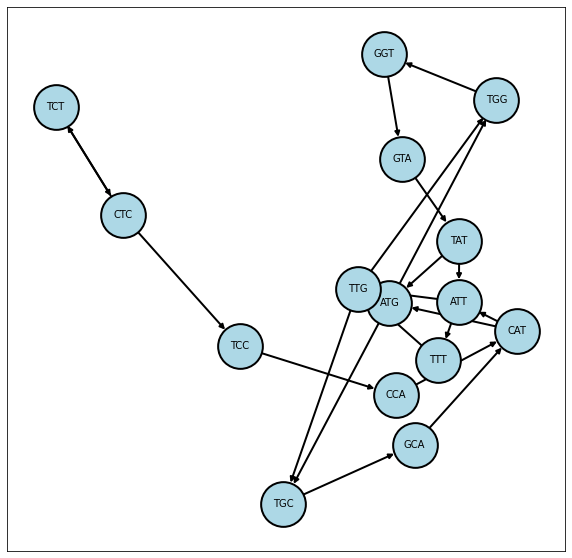

In [257]:
plt.figure(2,figsize=(10,10))
nx.draw_networkx(G,pos,**options)
plt.show()

In [258]:
edge1=list(edges)
node1=list(nodes)
Dict_Node = {}
count=0
for i in node1:
    Dict_Node.update({i:count})
    count+=1
print(Dict_Node)

{'ATG': 0, 'TGC': 1, 'TGG': 2, 'ATT': 3, 'TTG': 4, 'TTT': 5, 'CAT': 6, 'CCA': 7, 'CTC': 8, 'TCC': 9, 'TCT': 10, 'GCA': 11, 'GGT': 12, 'GTA': 13, 'TAT': 14}


In [259]:
def replaceKey(dict, key):   
    if key in dict.keys():
        return dict[key]
        
edgeAlternate = [[0,0] for i in range(len(edge1))]

for i in range(len(edge1)):
    edgeAlternate[i][0]=replaceKey(Dict_Node,edge1[i][0])
    edgeAlternate[i][1]=replaceKey(Dict_Node,edge1[i][1])

print(edgeAlternate)

[[0, 1], [0, 2], [1, 11], [2, 12], [3, 4], [3, 5], [4, 1], [4, 2], [5, 4], [5, 5], [6, 0], [6, 3], [7, 6], [8, 9], [8, 10], [9, 7], [10, 8], [11, 6], [12, 13], [13, 14], [14, 0], [14, 3]]


In [260]:
possibleOutcomes=[]
class Graph: 
    # Constructor
    def __init__(self, edges, n):
        
        self.adjList = [[] for _ in range(n)]
 
        for (src, dest) in edges:
            self.adjList[src].append(dest)
            self.adjList[dest].append(src)
 
def hamiltonianPaths(graph, v, visited, path, n):
 
    if len(path) == n:
        
        print(path)
        new = path
       
        for _ in range(n-1):
            new.append("hi")    
        possibleOutcomes.append(new)
        return 
 
   
    for w in graph.adjList[v]:
 

        if not visited[w]:
            visited[w] = True
            path.append(w)
 
            hamiltonianPaths(graph, w, visited, path, n)
 
            # backtrack
            visited[w] = False
            path.pop()
 
 
def findHamiltonianPaths(graph, n):
    for start in range(n):
 
      
        path = [start]
    
        visited = [False] * n
        visited[start] = True
    
        hamiltonianPaths(graph, start, visited, path, n)
 
 
if __name__ == '__main__':
    edges = edgeAlternate
    print(edges)
    n = len(nodes)
    graph = Graph(edges, n)
    findHamiltonianPaths(graph, n)
 


[[0, 1], [0, 2], [1, 11], [2, 12], [3, 4], [3, 5], [4, 1], [4, 2], [5, 4], [5, 5], [6, 0], [6, 3], [7, 6], [8, 9], [8, 10], [9, 7], [10, 8], [11, 6], [12, 13], [13, 14], [14, 0], [14, 3]]
[0, 2, 12, 13, 14, 3, 5, 4, 1, 11, 6, 7, 9, 8, 10]
[3, 5, 4, 2, 12, 13, 14, 0, 1, 11, 6, 7, 9, 8, 10]
[4, 5, 3, 14, 13, 12, 2, 0, 1, 11, 6, 7, 9, 8, 10]
[5, 3, 4, 2, 12, 13, 14, 0, 1, 11, 6, 7, 9, 8, 10]
[10, 8, 9, 7, 6, 0, 2, 12, 13, 14, 3, 5, 4, 1, 11]
[11, 1, 0, 14, 13, 12, 2, 4, 5, 3, 6, 7, 9, 8, 10]
[12, 13, 14, 3, 5, 4, 2, 0, 1, 11, 6, 7, 9, 8, 10]
[13, 12, 2, 0, 14, 3, 5, 4, 1, 11, 6, 7, 9, 8, 10]


In [261]:
new_dict = {value:key for (key,value) in Dict_Node.items()}
replaceKey(new_dict,0)

final = [[0 for _ in range(len(possibleOutcomes[0]))] for k in range(len(possibleOutcomes))]

for i in range(len(possibleOutcomes)):
    for j in range(len(possibleOutcomes[0])):
        final[i][j]=replaceKey(new_dict,possibleOutcomes[i][j])
        
print("All possible hamiltonian paths are = ")
print(final)

All possible hamiltonian paths are = 
[['ATG', 'TGG', 'GGT', 'GTA', 'TAT', 'ATT', 'TTT', 'TTG', 'TGC', 'GCA', 'CAT', 'CCA', 'TCC', 'CTC', 'TCT'], ['ATT', 'TTT', 'TTG', 'TGG', 'GGT', 'GTA', 'TAT', 'ATG', 'TGC', 'GCA', 'CAT', 'CCA', 'TCC', 'CTC', 'TCT'], ['TTG', 'TTT', 'ATT', 'TAT', 'GTA', 'GGT', 'TGG', 'ATG', 'TGC', 'GCA', 'CAT', 'CCA', 'TCC', 'CTC', 'TCT'], ['TTT', 'ATT', 'TTG', 'TGG', 'GGT', 'GTA', 'TAT', 'ATG', 'TGC', 'GCA', 'CAT', 'CCA', 'TCC', 'CTC', 'TCT'], ['TCT', 'CTC', 'TCC', 'CCA', 'CAT', 'ATG', 'TGG', 'GGT', 'GTA', 'TAT', 'ATT', 'TTT', 'TTG', 'TGC', 'GCA'], ['GCA', 'TGC', 'ATG', 'TAT', 'GTA', 'GGT', 'TGG', 'TTG', 'TTT', 'ATT', 'CAT', 'CCA', 'TCC', 'CTC', 'TCT'], ['GGT', 'GTA', 'TAT', 'ATT', 'TTT', 'TTG', 'TGG', 'ATG', 'TGC', 'GCA', 'CAT', 'CCA', 'TCC', 'CTC', 'TCT'], ['GTA', 'GGT', 'TGG', 'ATG', 'TAT', 'ATT', 'TTT', 'TTG', 'TGC', 'GCA', 'CAT', 'CCA', 'TCC', 'CTC', 'TCT']]


In [262]:
def FindHamiltonianString(ListofLists):
    Hamiltonian_String=[]
    for subList in ListofLists:
        m=subList[0]
        n=subList[1]
        i=0
        if m[1:]==n[:-1]:
            
            while i<len(subList)-2:
                m=subList[i+1]
                n=subList[i+2]
                if m[1:]==n[:-1]:  
                    i+=1
                else:
                    break
            if i+2 == len(subList):
                Hamiltonian_String.append(subList)
           
            
    return Hamiltonian_String

    
required=FindHamiltonianString(final)
print(" ")
print("Succesful Hamiltonian Paths = ")
print(required)

# reconstructing the successful hamiltonian path
def reconstruct(List):
    j=0
    newString=""
    for i in range(len(List)):
        if len(List)-1==i:
            new1=List[j]
            newString=newString+new1
            j+=1
        else:
            new1=List[j]
            newString=newString+new1[0:1]
            j+=1
    return newString

print()
for i in required:
    print(f"Reconstructed String = {reconstruct(i)}")

 
Succesful Hamiltonian Paths = 
[['TCT', 'CTC', 'TCC', 'CCA', 'CAT', 'ATG', 'TGG', 'GGT', 'GTA', 'TAT', 'ATT', 'TTT', 'TTG', 'TGC', 'GCA']]

Reconstructed String = TCTCCATGGTATTTGCA


nodes = ['TCT', 'CTC', 'TCC', 'CCA', 'CAT', 'ATG', 'ATT', 'TGG', 'TGC', 'GGT', 'GTA', 'TAT', 'TTT', 'TTG', 'GCA']
 
edges = [('TCT', 'CTC'), ('CTC', 'TCT'), ('CTC', 'TCC'), ('TCC', 'CCA'), ('CCA', 'CAT'), ('CAT', 'ATG'), ('CAT', 'ATT'), ('ATG', 'TGG'), ('ATG', 'TGC'), ('ATT', 'TTT'), ('ATT', 'TTG'), ('TGG', 'GGT'), ('TGC', 'GCA'), ('GGT', 'GTA'), ('GTA', 'TAT'), ('TAT', 'ATG'), ('TAT', 'ATT'), ('TTT', 'TTT'), ('TTT', 'TTG'), ('TTG', 'TGG'), ('TTG', 'TGC'), ('GCA', 'CAT')]


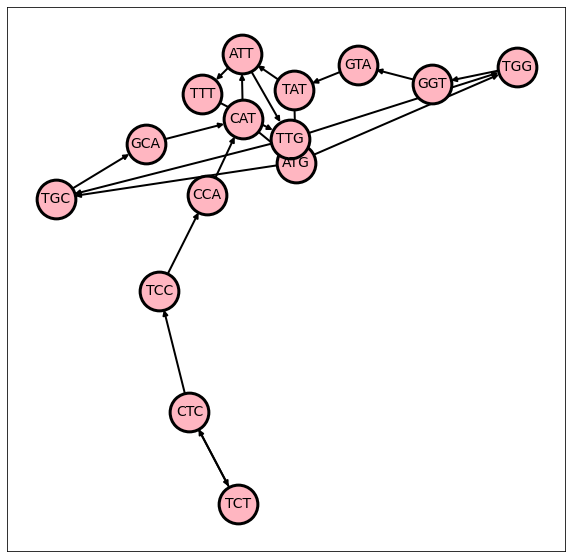


  Original String   = TCTCCATGCATTTGGTATTTT
Reconstructed String = TCTCCATGGTATTTGCA


In [263]:
# diplaying the hamiltonian path

G1 = nx.DiGraph()
G1.add_edges_from(KmerListOfNodes(required[0]),length=100)

totalNodes=G1.nodes()
pos = nx.spring_layout(G1)
options = {
    "font_size": 14,
    "node_size": 1500,
    "node_color": "lightpink",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 2,
    "edge_vmin":5
}

nodes=G1.nodes()
edges=G1.edges()
print(f"nodes = {nodes()}")
print(" ")
print(f"edges = {edges}")

plt.figure(1,figsize=(10,10))
nx.draw_networkx(G1,pos,**options)
plt.show()

print()
print(f"  Original String   = {genome1}")
for i in required:
    print(f"Reconstructed String = {reconstruct(i)}")

In [264]:
stop = timeit.default_timer()
c=print('Run Time: ', stop - start)

Run Time:  2.8447159999923315


In [265]:
# debrijin
start = timeit.default_timer()
def kmers(read, k):
    KList=[]
    num_kmers = len(read) - k + 1
    for i in range(num_kmers):
        kmer = read[i:i+k]
        if i==0:
            KList.append(kmer)
        else:
            KList.append(kmer)    
    return KList

input1="TCTCCATGCATTTGGTATTTT"
Kmers=kmers(input1,3)

print(f"Kmers={Kmers}")
print(" ")

def FindNodesFromEdges(KmerList):
    NodesListOfLists=[]
    for edge in KmerList:
        NodesListOfLists.append([edge[:-1],edge[1:]])
        
    return NodesListOfLists

NodesListOfLists = FindNodesFromEdges(Kmers)
print(f"Nodes = {NodesListOfLists}")


Kmers=['TCT', 'CTC', 'TCC', 'CCA', 'CAT', 'ATG', 'TGC', 'GCA', 'CAT', 'ATT', 'TTT', 'TTG', 'TGG', 'GGT', 'GTA', 'TAT', 'ATT', 'TTT', 'TTT']
 
Nodes = [['TC', 'CT'], ['CT', 'TC'], ['TC', 'CC'], ['CC', 'CA'], ['CA', 'AT'], ['AT', 'TG'], ['TG', 'GC'], ['GC', 'CA'], ['CA', 'AT'], ['AT', 'TT'], ['TT', 'TT'], ['TT', 'TG'], ['TG', 'GG'], ['GG', 'GT'], ['GT', 'TA'], ['TA', 'AT'], ['AT', 'TT'], ['TT', 'TT'], ['TT', 'TT']]


nodes = ['TC', 'CT', 'CC', 'CA', 'AT', 'TG', 'GC', 'TT', 'GG', 'GT', 'TA']
 
edges = [('TC', 'CT'), ('TC', 'CC'), ('CT', 'TC'), ('CC', 'CA'), ('CA', 'AT'), ('CA', 'AT'), ('AT', 'TG'), ('AT', 'TT'), ('AT', 'TT'), ('TG', 'GC'), ('TG', 'GG'), ('GC', 'CA'), ('TT', 'TT'), ('TT', 'TT'), ('TT', 'TT'), ('TT', 'TG'), ('GG', 'GT'), ('GT', 'TA'), ('TA', 'AT')]


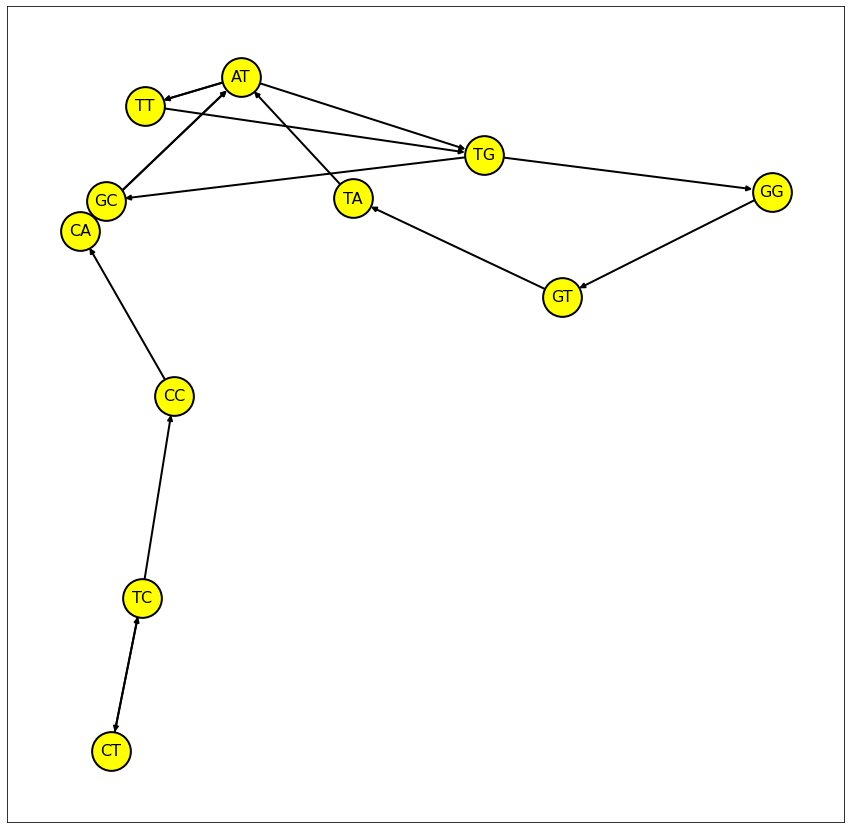

In [266]:
G = nx.MultiDiGraph()
G.add_edges_from(NodesListOfLists)
totalNodes=G.nodes()
pos = nx.spring_layout(G)
options = {
    "font_size": 16,
    "node_size": 1500,
    "node_color": "yellow",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
    "edge_vmin":5
}
nodes=G.nodes()
edges=G.edges()

print(f"nodes = {nodes()}")
print(" ")
print(f"edges = {edges}")

plt.figure(2,figsize=(15,15))
nx.draw_networkx(G,pos,**options)
plt.show()

In [267]:
# converting list of lists in dictionary format
def ConvertListToDict(List):
    Dict={}
    for i in List:
        if i[0] in Dict.keys():
            newList = Dict[i[0]]
            newList.extend([i[1]])
            Dict.update({i[0]: newList})
        else:
            Dict[i[0]] = [i[1]]
    return Dict

Output=ConvertListToDict(edges)

In [268]:
def eulerian_cycle(edge_dict):
    tempo1=list(edge_dict.keys())
    current_node = tempo1[0]
    path = [current_node]
    while True:
        path.append(edge_dict[current_node][0])

        if len(edge_dict[current_node]) == 1:
            del edge_dict[current_node]
        else:
            edge_dict[current_node] = edge_dict[current_node][1:]

        if path[-1] in edge_dict:
            current_node = path[-1]
        else:
            break
    while len(edge_dict) > 0:
        for i in range(len(path)):
            if path[i] in edge_dict:
                current_node = path[i]
                cycle = [current_node]
                while True:
                    cycle.append(edge_dict[current_node][0])

                    if len(edge_dict[current_node]) == 1:
                        del edge_dict[current_node]
                    else:
                        edge_dict[current_node] = edge_dict[current_node][1:]

                    if cycle[-1] in edge_dict:
                        current_node = cycle[-1]
                    else:
                        break

                path = path[:i] + cycle + path[i+1:]
                break
    return path

print()
print(" Final Eulerian Path is ")
print()
path = eulerian_cycle(Output)
print ('->'.join(map(str,path)))
print(path)


 Final Eulerian Path is 

TC->CT->TC->CC->CA->AT->TG->GC->CA->AT->TT->TT->TT->TT->TG->GG->GT->TA->AT->TT
['TC', 'CT', 'TC', 'CC', 'CA', 'AT', 'TG', 'GC', 'CA', 'AT', 'TT', 'TT', 'TT', 'TT', 'TG', 'GG', 'GT', 'TA', 'AT', 'TT']


In [269]:
def reconstructString(List):
    String=""
    String=String+List[0]
    
    for i in range(1,len(List)):
        newWord = List[i]
        String=String+newWord[-1]
        
    return String    

In [270]:
print(f"    Original String   : {input1}")
print(f" Reconstructed String : {reconstructString(path)}")

    Original String   : TCTCCATGCATTTGGTATTTT
 Reconstructed String : TCTCCATGCATTTTTGGTATT


In [271]:
stop = timeit.default_timer()
a= stop - start
print('Run Time: ', a)


Run Time:  1.6248672999936389


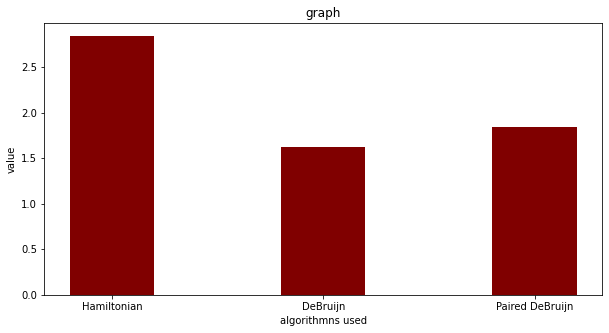

In [274]:
data={'Hamiltonian':2.844, 'DeBruijn': 1.624, 'Paired DeBruijn' :1.847}
methods = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(methods, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("algorithmns used")
plt.ylabel("value")
plt.title("graph")
plt.show()